In [61]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings(action="ignore")
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
import re
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to C:\Users\Tanmay
[nltk_data]     Chakraborty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# read the training data csv
train_df=pd.read_csv(r"C:\Learning Content\DS\NLP\Yt Projects\Movie Genre Classifier\train.csv")

In [3]:
## head of the training dataset
train_df.head(3)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama


In [4]:
#shape of the training dataset
print("Shape of the training data is ",train_df.shape)

Shape of the training data is  (22579, 3)


In [5]:
# checking number of genres we have in training dataset
train_df["genre"].unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

<Axes: xlabel='genre'>

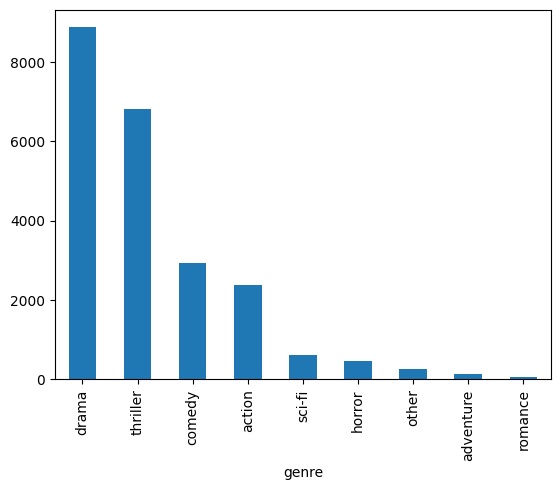

In [6]:
# occurenes of genres in the training dataset
train_df["genre"].value_counts().plot.bar()

In [7]:
#drop unnecessary column named as `id`
train_df=train_df.drop(["id"],axis=1)

In [8]:
# cleaning the dataset
corpus=[]

#initialize the stemmer class
stemmer = PorterStemmer()

for row in tqdm(range(train_df.shape[0])):
    # removing non alphabetic characters
    data=re.sub(pattern='[^a-zA-Z]',repl=" ",string=train_df.iloc[row,0])
    # converting all the words to lower case
    lower_case_data=data.lower()
    # tokenizing words
    token_word=lower_case_data.split()
    # removing stop words
    removed_stop_words=[word for word in token_word if word not in stopwords.words("english")]
    # stemming tokens
    stemmed_words=[stemmer.stem(word) for word in removed_stop_words]
    # joining the stemmed words back to string
    final_script = " ".join(stemmed_words)
    # appending the final corpus
    corpus.append(final_script)
    

100%|██████████| 22579/22579 [14:12<00:00, 26.48it/s]


In [9]:
corpus

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [10]:
# list of genres
train_df["genre"].unique()

array(['thriller', 'comedy', 'drama', 'action', 'sci-fi', 'other',
       'romance', 'horror', 'adventure'], dtype=object)

In [13]:
# thriller scripts
thriller_words=[corpus[idx] for idx in list(train_df[train_df["genre"]=="thriller"].index)]
thriller_words

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'ded two detect int jeff apart night medium shot thorwald fight dislodg jeff grip ext jeff apart night close shot look jeff face show strain pain thorwald attack brick floor patio seem hundr feet int jeff apart night medium shot thorwald jeff struggl ext neighborhood night semi close shot doyl pull top wall lisa stella two men look lisa white face frighten int jeff apart night medium shot thorwald s

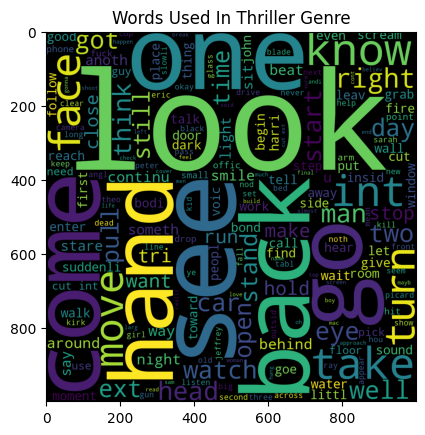

In [16]:
# wordcloud for thriller genre
wordcld=WordCloud(width=1000,height=1000).generate(" ".join(thriller_words))
plt.imshow(wordcld)
plt.title("Words Used In Thriller Genre")
plt.show()

In [17]:
# adventure scripts
adventure_words=[corpus[idx] for idx in list(train_df[train_df["genre"]=="adventure"].index)]
adventure_words

['e forgiv majesti request audienc late hour travel way moscow see matter cannot wait alexand well gener wish say gener kutusov majesti advis receiv letter napoleon offer peac treati decid accept alexand decid accept principl negoti term establish gener kutusov may majesti would like offer dissent opinion alexand gener kutusov feel free say whatev like gener kutusov believ right say fire countri grown weari war interest continu battl alexand proceed gener kutusov sinc fire complet new spirit arous nation french becom armi crimin russia must aven',
 'nd ever increas popular prevent directori replac napoleon v moment foresaw might alreadi felt earth flee beneath carri away sky int bedroom milan palac day napoleon josephin make love sunlight fall bodi josephin v dear theres journey milan difficult uncomfort imagin bore death husband love worship fear go mad love wors fear poor hippolyt may indiscreet journey think joseph junot suspect someth int offic milan palac day orderli announc capta

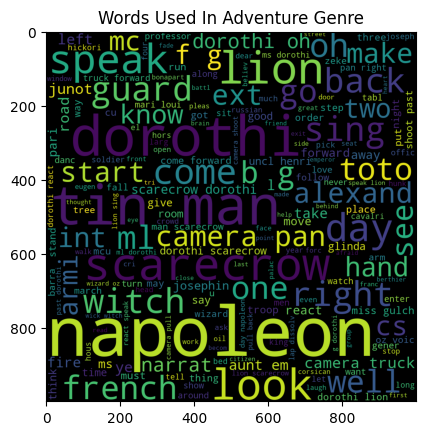

In [18]:
# wordcloud for adventure genre
wordcld=WordCloud(width=1000,height=1000).generate(" ".join(adventure_words))
plt.imshow(wordcld)
plt.title("Words Used In Adventure Genre")
plt.show()

In [40]:
## converting our corpus into numbers
tfidf=TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x)
input=tfidf.fit_transform(corpus).toarray()

In [66]:
## converting our corpus into numbers
cv=CountVectorizer(max_features=50000)
input=cv.fit_transform(corpus).toarray()

In [67]:
input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [68]:
# applying label encoder on target 
lblen=LabelEncoder()
output=lblen.fit_transform(train_df["genre"])

In [69]:
# building a model
Xtrain,Xtest,Ytrain,Ytest= train_test_split(input,output,test_size=0.1,random_state=12)
print(f"Xtrain size {Xtrain.shape} and Xtest size {Xtest.shape}")

Xtrain size (20321, 41710) and Xtest size (2258, 41710)


In [70]:
# multinomial naive bayes model
mlb=MultinomialNB(alpha=1)
mlb.fit(Xtrain,Ytrain)

MultinomialNB(alpha=1)

In [71]:
#prediction on the test dataset
output_pred=mlb.predict(Xtest)

In [72]:
# check the accuracy of the model on testing dataset
print(classification_report(y_true=Ytest,y_pred=output_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       227
           1       1.00      0.67      0.80        18
           2       0.90      0.92      0.91       286
           3       0.91      0.93      0.92       955
           4       1.00      0.44      0.61        48
           5       1.00      0.56      0.71        36
           6       1.00      0.40      0.57         5
           7       1.00      0.70      0.82        47
           8       0.89      0.93      0.91       636

    accuracy                           0.91      2258
   macro avg       0.96      0.72      0.80      2258
weighted avg       0.91      0.91      0.90      2258



In [77]:
# prediction on the test dataset(provided by the team)
test_df=pd.read_csv("test.csv")
#drop unnecessary column named as `id`
test_df=test_df.drop(["id"],axis=1)
# cleaning the dataset
corpus_pred=[]

#initialize the stemmer class
stemmer = PorterStemmer()

for row in tqdm(range(test_df.shape[0])):
    # removing non alphabetic characters
    data=re.sub(pattern='[^a-zA-Z]',repl=" ",string=str(test_df.iloc[row,0]))
    # converting all the words to lower case
    lower_case_data=data.lower()
    # tokenizing words
    token_word=lower_case_data.split()
    # removing stop words
    removed_stop_words=[word for word in token_word if word not in stopwords.words("english")]
    # stemming tokens
    stemmed_words=[stemmer.stem(word) for word in removed_stop_words]
    # joining the stemmed words back to string
    final_script = " ".join(stemmed_words)
    # appending the final corpus
    corpus_pred.append(final_script)
    

100%|██████████| 5589/5589 [02:51<00:00, 32.56it/s]


In [79]:
# converting our corpus into numbers
input_pred=cv.transform(corpus_pred).toarray()

In [82]:
#prediction
output_pred=mlb.predict(input_pred)
output_genre=lblen.inverse_transform(output_pred)

In [89]:
# create a frequency dictionary 
frequency_dict={}

for genre in set(output_genre):
    frequency_dict[genre]=output_genre.tolist().count(genre)

In [90]:
frequency_dict

{'romance': 6,
 'horror': 48,
 'adventure': 20,
 'other': 31,
 'drama': 2308,
 'sci-fi': 109,
 'action': 639,
 'comedy': 660,
 'thriller': 1768}